# Compare the UVJ from the selection, vs the UVJ recalculated with the filters and astSED

In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
import sys
sys.path.append('../')
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

In [2]:
# All we are doing in this script is reading in 2 dataframes, and plotting the uv, and vj coordinates
# of the sources in the dataframes. We are also plotting the SED of the sources in the dataframes.
# read in the first 
# read in the first dataframe
selected_ids_df = pd.read_csv('full_cdfs_ids.csv')
recalculated_df = pd.read_csv('RecalculatedUVJids_full.csv')

In [3]:
selected_ids_df

,id,zpk,uv,vj
0,5880,1.8316,0.843975,0.801469
1,5886,1.1001,0.580949,0.407415
2,5928,0.7154,1.482554,1.256439
3,5972,0.9668,0.788785,1.086186
4,6034,0.3502,0.898603,0.438185
...,...,...,...,...
7701,30807,1.1353,0.488649,0.291412
7702,30810,1.4991,0.710090,0.390829
7703,30861,0.8414,0.612418,0.004617
7704,30873,1.7169,0.484812,0.598343


In [4]:
recalculated_df

,ID,UV,VJ,GalaxyType
0,10002,0.665034,0.304816,1.0
1,10003,1.032593,-0.302140,1.0
2,10019,0.784214,0.479189,1.0
3,10020,0.942676,-0.037427,1.0
4,10029,0.978791,0.462154,1.0
...,...,...,...,...
6971,9983,0.262194,0.789665,1.0
6972,9988,0.364083,0.139011,1.0
6973,9992,0.566491,0.465869,1.0
6974,9994,0.249918,0.071723,1.0


In [6]:
# trim down both of the dataframes so only the sources that are in both are kept - based on id
selected_ids_df = selected_ids_df[selected_ids_df['id'].isin(recalculated_df['ID'])]

In [9]:
#selected_ids_df
#recalculated_df

,id,zpk,uv,vj
2,5928,0.7154,1.482554,1.256439
3,5972,0.9668,0.788785,1.086186
4,6034,0.3502,0.898603,0.438185
5,6049,0.9595,0.750871,0.005041
6,6148,1.2637,0.504476,0.635472
...,...,...,...,...
7701,30807,1.1353,0.488649,0.291412
7702,30810,1.4991,0.710090,0.390829
7703,30861,0.8414,0.612418,0.004617
7704,30873,1.7169,0.484812,0.598343


In [12]:
# generate a histogram comparing the differnce in the the vector magnitudes in UVJ space
# between the two dataframes
# vector magnitudes are calculated as sqrt(UV^2 + VJ^2)

# create a new col with vector magnitudes for each dataframe
selected_ids_df['vector_magnitude'] = np.sqrt(selected_ids_df['uv']**2 + selected_ids_df['vj']**2)
recalculated_df['vector_magnitude'] = np.sqrt(recalculated_df['UV']**2 + recalculated_df['VJ']**2)

C:\Users\Titan\AppData\Local\Temp\ipykernel_45088\3488111359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_ids_df['vector_magnitude'] = np.sqrt(selected_ids_df['uv']**2 + selected_ids_df['vj']**2)


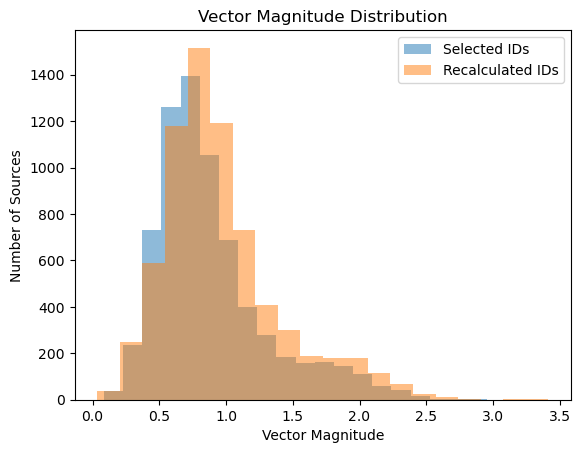

In [13]:
# plot the histograms
plt.hist(selected_ids_df['vector_magnitude'], bins=20, alpha=0.5, label='Selected IDs')
plt.hist(recalculated_df['vector_magnitude'], bins=20, alpha=0.5, label='Recalculated IDs') 
plt.xlabel('Vector Magnitude')
plt.ylabel('Number of Sources')
plt.legend()
plt.title('Vector Magnitude Distribution')
plt.show()

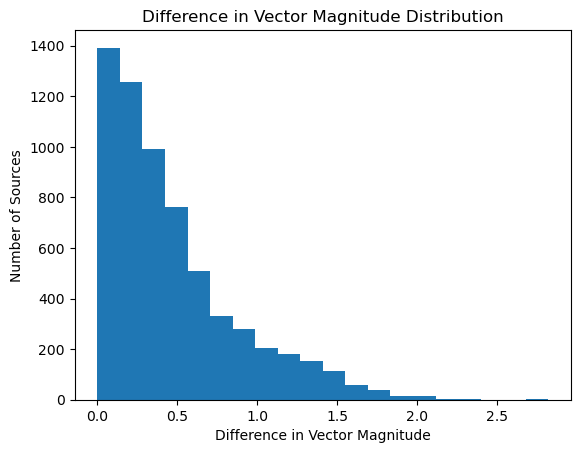

In [15]:
# Find the difference in vector magnitudes for each ID, and plot them on a histogram
# find the difference between the vector magnitudes
vector_diff = abs(selected_ids_df['vector_magnitude'] - recalculated_df['vector_magnitude'])
plt.figure()
plt.hist(vector_diff, bins=20)
plt.xlabel('Difference in Vector Magnitude')
plt.ylabel('Number of Sources')
plt.title('Difference in Vector Magnitude Distribution')
plt.show()

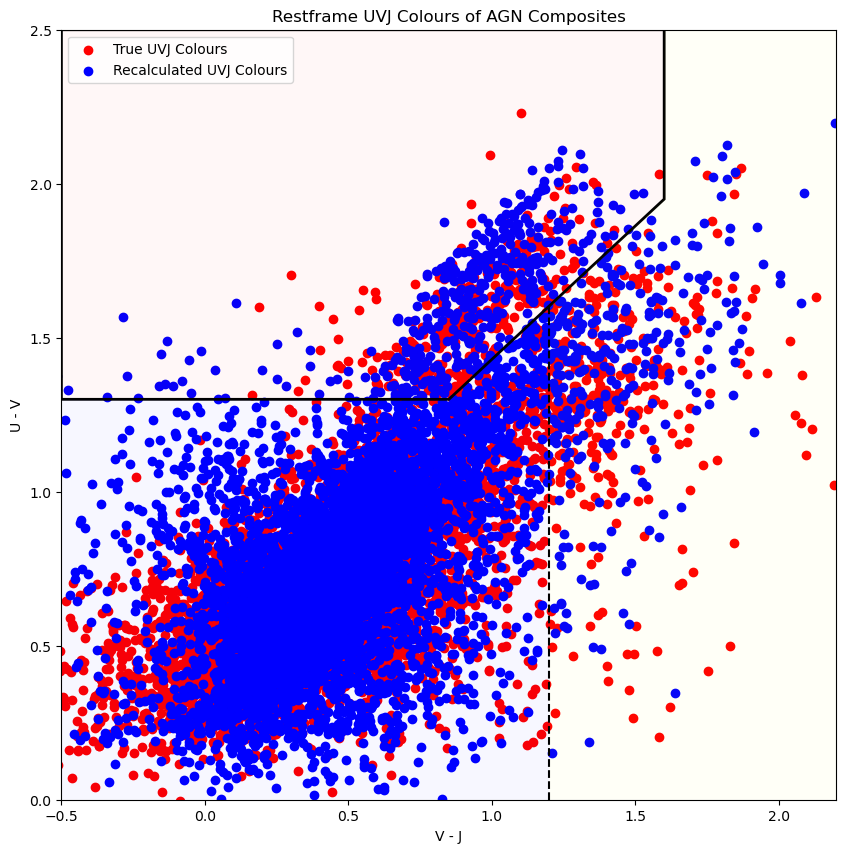

In [16]:
# Plot the UVJ diagram
plt.figure(figsize=(10, 10))
plt.scatter(selected_ids_df['vj'], selected_ids_df['uv'], c='r', label='True UVJ Colours')
plt.scatter(recalculated_df['VJ'], recalculated_df['UV'], c='b', label='Recalculated UVJ Colours')
# Plot an arrow to show the direction the UVJ point has moved from the selected id at index 1, to the recalculated at index 1, etc
b =0.75
a = b
#for i in range(len(selected_ids_df)):
    # Making sure the arrow tip is at the position of the new UVJ point, not covering it
    #plt.arrow(selected_ids_df['vj'][i], selected_ids_df['uv'][i], recalculated_df['VJ'][i] - selected_ids_df['vj'][i], recalculated_df['UV'][i] - selected_ids_df['uv'][i], head_width=0.05, head_length=0.09, fc='k', ec='k')
    # Mark an arrow from the red dot to the blue dot, but make sure the arrow head is not covering the blue dot
    #plt.arrow(selected_ids_df['vj'][i], selected_ids_df['uv'][i], recalculated_df['VJ'][i] - selected_ids_df['vj'][i], recalculated_df['UV'][i] - selected_ids_df['uv'][i], head_width=0.05, head_length=0.09, fc='k', ec='k')
    #plt.arrow(selected_ids_df['vj'][i], selected_ids_df['uv'][i], (recalculated_df['VJ'][i] - selected_ids_df['vj'][i])*a, (recalculated_df['UV'][i] - selected_ids_df['uv'][i])*b, head_width=0.03, head_length=0.03, fc='k', ec='k')
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Plot the names
# for i in range(len(selected_ids_df)):
#     #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
#     plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
plt.legend()
plt.show()